In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pickle

In [2]:
d=pd.read_csv('Car details v3.csv')
d.drop(['torque'],axis=1,inplace=True)
d.drop(['max_power'],axis=1,inplace=True)
d.drop(['mileage'],axis=1,inplace=True)
d.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,5.0


In [3]:
d.shape
#number of columns and number of rows

(8128, 10)

In [4]:
#UNIQUE VALUES PRESENT IN CATEGORICAL COLUMNS

print(d['engine'].unique())
print(d['owner'].unique())
print(d['fuel'].unique())
#print(d[''].unique())

['1248 CC' '1498 CC' '1497 CC' '1396 CC' '1298 CC' '1197 CC' '1061 CC'
 '796 CC' '1364 CC' '1399 CC' '1461 CC' '993 CC' nan '1198 CC' '1199 CC'
 '998 CC' '1591 CC' '2179 CC' '1368 CC' '2982 CC' '2494 CC' '2143 CC'
 '2477 CC' '1462 CC' '2755 CC' '1968 CC' '1798 CC' '1196 CC' '1373 CC'
 '1598 CC' '1998 CC' '1086 CC' '1194 CC' '1172 CC' '1405 CC' '1582 CC'
 '999 CC' '2487 CC' '1999 CC' '3604 CC' '2987 CC' '1995 CC' '1451 CC'
 '1969 CC' '2967 CC' '2497 CC' '1797 CC' '1991 CC' '2362 CC' '1493 CC'
 '1599 CC' '1341 CC' '1794 CC' '799 CC' '1193 CC' '2696 CC' '1495 CC'
 '1186 CC' '1047 CC' '2498 CC' '2956 CC' '2523 CC' '1120 CC' '624 CC'
 '1496 CC' '1984 CC' '2354 CC' '814 CC' '793 CC' '1799 CC' '936 CC'
 '1956 CC' '1997 CC' '1499 CC' '1948 CC' '2997 CC' '2489 CC' '2499 CC'
 '2609 CC' '2953 CC' '1150 CC' '1994 CC' '1388 CC' '1527 CC' '2199 CC'
 '995 CC' '2993 CC' '1586 CC' '1390 CC' '909 CC' '2393 CC' '3198 CC'
 '1339 CC' '2835 CC' '2092 CC' '1595 CC' '2496 CC' '1596 CC' '1597 CC'
 '2596 CC' '2

In [5]:
#checking missing values
d.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
engine           221
seats            221
dtype: int64

In [6]:
d=pd.DataFrame(d)

d.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,5.0


In [7]:
d.dropna(axis=0,)
d.shape
#d.isnull().sum()

(8128, 10)

In [8]:
d.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
engine           221
seats            221
dtype: int64

In [9]:
## Printing THOSE ROWS HAVING NUMBER OF SEATS AS NULL VALUE


## Below command gives indices of those rows where seats are filled as NULL
a=np.where(d['seats'].isnull())[0]
## Printing rows whose indices are stored in a , a is numpy array
for i in a:
  print(d.loc[[i]],'\n')
###b1=d.columns


        

                    name  year  selling_price  km_driven    fuel seller_type  \
13  Maruti Swift 1.3 VXi  2007         200000      80000  Petrol  Individual   

   transmission         owner engine  seats  
13       Manual  Second Owner    NaN    NaN   

                  name  year  selling_price  km_driven    fuel seller_type  \
31  Fiat Palio 1.2 ELX  2003          70000      50000  Petrol  Individual   

   transmission         owner engine  seats  
31       Manual  Second Owner    NaN    NaN   

               name  year  selling_price  km_driven    fuel seller_type  \
78  Tata Indica DLS  2003          50000      70000  Diesel  Individual   

   transmission        owner engine  seats  
78       Manual  First Owner    NaN    NaN   

                           name  year  selling_price  km_driven    fuel  \
87  Maruti Swift VDI BSIV W ABS  2015         475000      78000  Diesel   

   seller_type transmission        owner engine  seats  
87      Dealer       Manual  First Owner   

In [10]:
#deleting all rows containing any null value
d= d.dropna(how='any',axis=0) 
d.shape
#try to check without deleting NaN values

(7907, 10)

In [11]:
d.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
engine           0
seats            0
dtype: int64

In [12]:
## Adding new feature of number of years in dataset
d['current_year']=2022
d['no_years']=d['current_year']-d['year']
d.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats,current_year,no_years
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,5.0,2022,8
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,5.0,2022,8
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,5.0,2022,16
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,5.0,2022,12
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,5.0,2022,15


In [13]:
d.drop(['year'],axis=1,inplace=True)
d.drop(['name'],axis=1,inplace=True)
d.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats,current_year,no_years
0,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,5.0,2022,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,5.0,2022,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,5.0,2022,16
3,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,5.0,2022,12
4,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,5.0,2022,15


In [14]:
d.drop(['current_year'],axis=1,inplace=True)

d.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats,no_years
0,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,5.0,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,5.0,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,5.0,16
3,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,5.0,12
4,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,5.0,15


In [15]:
#Applying on-hot encoding on the data set as a part of feature extraction
d=pd.get_dummies(d,drop_first=True)
d.shape

(7907, 134)

In [16]:
final_dataset=pd.DataFrame(d)
X=final_dataset.iloc[:,1:]
Y=final_dataset.iloc[:,0]

In [17]:
X.head()

,km_driven,seats,no_years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,...,engine_793 CC,engine_796 CC,engine_799 CC,engine_814 CC,engine_909 CC,engine_936 CC,engine_993 CC,engine_995 CC,engine_998 CC,engine_999 CC
0,145500,5.0,8,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,5.0,8,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,140000,5.0,16,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,127000,5.0,12,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,120000,5.0,15,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [19]:
print(model.feature_importances_)

[4.31921406e-02 1.08332321e-02 9.68064143e-02 5.14309023e-02
 5.35713539e-06 2.97165907e-02 2.92436784e-02 2.39906255e-04
 3.49304244e-01 2.78546195e-04 2.35738749e-03 1.42029813e-02
 6.05654977e-04 7.86682296e-06 5.72769730e-05 1.50734789e-04
 1.84071444e-06 6.75450503e-06 4.95244828e-04 3.34870853e-05
 5.85981283e-05 7.80086052e-05 1.06141821e-03 3.82256882e-04
 3.00899360e-04 2.75313215e-03 3.07967896e-05 5.85341689e-07
 1.24834052e-06 1.14414205e-06 4.93143212e-07 1.01408372e-04
 8.11163004e-04 5.39827914e-04 1.09527437e-06 1.02377504e-06
 2.80328417e-04 1.38070559e-04 5.55783807e-04 1.63281971e-07
 7.01259458e-04 4.57012690e-04 1.70760889e-04 4.34049063e-07
 8.05085982e-04 1.93195339e-06 2.02816559e-04 2.41848765e-03
 1.85291586e-03 1.58146112e-04 2.76527302e-06 2.19153446e-03
 1.28524246e-05 4.75778835e-07 1.89037692e-03 1.16197937e-04
 1.25782906e-05 6.59362009e-04 1.09493941e-04 2.09141330e-05
 2.78396280e-05 2.50638893e-04 8.19094550e-07 6.69326050e-05
 1.02228505e-04 2.611312

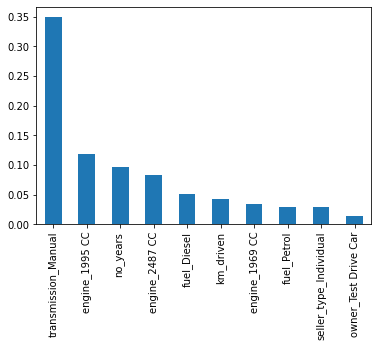

In [20]:
## displaying top 10 important features to consider for prediction
feat_importance= pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='bar')
plt.show()

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)


In [22]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [23]:
#setting n estimators using grid search CV
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 10)]


In [24]:
from sklearn.model_selection import RandomizedSearchCV
# max_depth
max_depth = [int(x) for x in np.linspace(7, 35, num = 8)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [25]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 222, 344, 466, 588, 711, 833, 955, 1077, 1200], 'max_depth': [7, 11, 15, 19, 23, 27, 31, 35], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [26]:

# First create the base model to tune
rf = RandomForestRegressor()

In [27]:
# Use the random grid to search for best hyperparameters
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 15 , cv = 5, verbose=2, random_state=36)

In [28]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=100, n_estimators=711; total time=  11.4s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=100, n_estimators=711; total time=   9.8s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=100, n_estimators=711; total time=  10.6s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=100, n_estimators=711; total time=   9.8s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=100, n_estimators=711; total time=   9.7s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.9s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.9s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.0s
[CV] END max_depth=19, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.0s
[CV] END max_depth=1

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=15,
                   param_distributions={'max_depth': [7, 11, 15, 19, 23, 27, 31,
                                                      35],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 222, 344, 466,
                                                         588, 711, 833, 955,
                                                         1077, 1200]},
                   random_state=36, scoring='neg_mean_squared_error',
                   verbose=2)

In [29]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 19}

In [30]:
rf_random.best_score_

-65476530617.37306

In [31]:
predictions=rf_random.predict(X_test)

In [32]:
predictions

array([503260.09485179, 683958.95991915, 404440.27281716, ...,
       747427.24806385, 846598.60063811, 421612.52507215])

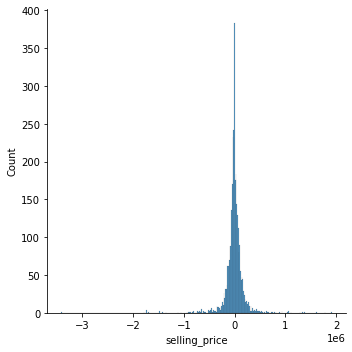

In [33]:
sns.displot(Y_test-predictions)

The above graph shows that output is normally distributed (standard gaussian distribution)

In [34]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 100684.84254414366
MSE: 40271512420.34211
RMSE: 200677.63308436272


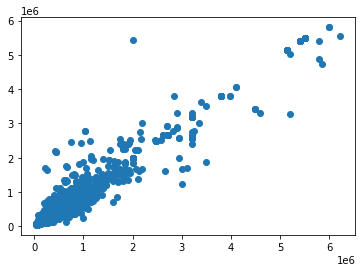

In [35]:
plt.scatter(Y_test,predictions)

This shows that predictions are somewhat linear

In [36]:
# open a file, where you ant to store the data
file = open('Copy_of_pr_cardekho_Copy1.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [47]:
arr=X_test.columns
print(arr)

Index(['km_driven', 'seats', 'no_years', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       ...
       'engine_793 CC', 'engine_796 CC', 'engine_799 CC', 'engine_814 CC',
       'engine_909 CC', 'engine_936 CC', 'engine_993 CC', 'engine_995 CC',
       'engine_998 CC', 'engine_999 CC'],
      dtype='object', length=133)


In [45]:

for i in range (0,133):
    print('"',arr[i],'"',',',end=" ")

" km_driven " , " seats " , " no_years " , " fuel_Diesel " , " fuel_LPG " , " fuel_Petrol " , " seller_type_Individual " , " seller_type_Trustmark Dealer " , " transmission_Manual " , " owner_Fourth & Above Owner " , " owner_Second Owner " , " owner_Test Drive Car " , " owner_Third Owner " , " engine_1061 CC " , " engine_1086 CC " , " engine_1120 CC " , " engine_1150 CC " , " engine_1172 CC " , " engine_1186 CC " , " engine_1193 CC " , " engine_1194 CC " , " engine_1196 CC " , " engine_1197 CC " , " engine_1198 CC " , " engine_1199 CC " , " engine_1248 CC " , " engine_1298 CC " , " engine_1299 CC " , " engine_1339 CC " , " engine_1341 CC " , " engine_1343 CC " , " engine_1364 CC " , " engine_1368 CC " , " engine_1373 CC " , " engine_1388 CC " , " engine_1390 CC " , " engine_1396 CC " , " engine_1399 CC " , " engine_1405 CC " , " engine_1422 CC " , " engine_1451 CC " , " engine_1461 CC " , " engine_1462 CC " , " engine_1489 CC " , " engine_1493 CC " , " engine_1495 CC " , " engine_1496 